<a href="https://colab.research.google.com/github/DwiRizkyAriyansyah/UTS_Analitik-visualisasi-data/blob/main/Adidas_VS_Nike_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [ ]:
# 2. Load Dataset

# Membaca dataset dari file 'manga.csv' dan menyimpannya ke dalam DataFrame bernama df
df = pd.read_csv('Adidas Vs Nike.csv')

# Menampilkan 5 baris pertama dari dataset untuk melihat struktur dan sampel datanya
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


## Eksplorasi dan Praproses Data

In [ ]:
# 3. Eksplorasi dan Praproses Data

# Menampilkan informasi umum tentang dataset, termasuk jumlah entri, tipe data, dan non-null count per kolom
print("Informasi Data:")
print(df.info())

# Menampilkan jumlah missing values (nilai kosong) pada setiap kolom
print("\nCek Missing Values:")
print(df.isnull().sum())

# Menghapus kolom yang memiliki missing values lebih dari 20% total baris
df = df.dropna(thresh=0.8*len(df), axis=1)

# Menghapus seluruh baris yang masih memiliki missing values setelah proses sebelumnya
df = df.dropna()

# Melakukan encoding pada kolom-kolom bertipe kategorikal (object) menjadi numerik
# Menggunakan LabelEncoder untuk mengubah nilai string menjadi angka
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB
None

Cek Missing Values:
Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64


Bagian kode ini digunakan untuk membersihkan dan menyiapkan data. Pertama, ditampilkan informasi struktur dataset dan jumlah missing values. Kolom dengan terlalu banyak missing values (lebih dari 20%) dihapus, lalu baris yang masih mengandung missing values juga dibuang. Setelah data bersih, semua kolom kategorikal dikonversi menjadi bentuk numerik menggunakan LabelEncoder agar bisa diproses oleh algoritma machine learning.

## Pisahkan fitur dan target

In [ ]:
# 4. Pisahkan fitur dan target

# Memisahkan fitur (X) dan target (y) dari dataset
# X berisi semua kolom kecuali 'Reviews', yang akan digunakan sebagai fitur input
X = df.drop('Reviews', axis=1)
# y berisi kolom 'Reviews', yang akan dijadikan target/output untuk prediksi
y = df['Reviews']

# Menampilkan bentuk (dimensi) dari X dan y untuk memastikan pemisahan berjalan dengan benar
print("Ukuran fitur (X):", X.shape)
print("Ukuran target (y):", y.shape)


Ukuran fitur (X): (3265, 9)
Ukuran target (y): (3265,)


Kode ini memisahkan dataset menjadi dua bagian: X (fitur-fitur yang digunakan untuk memprediksi) dan y (target yang akan diprediksi, yaitu kolom 'Reviews'). Tidak ada output secara default karena hanya melakukan assignment. Untuk memastikan hasilnya benar, kita tambahkan print(X.shape) dan print(y.shape) agar terlihat jumlah baris dan kolom dari masing-masing bagian.

## Split data train dan test

In [ ]:
# 5. Split data train dan test

#Memisahkan data menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran masing-masing data hasil split
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test :", y_test.shape)


Ukuran X_train: (2612, 9)
Ukuran X_test : (653, 9)
Ukuran y_train: (2612,)
Ukuran y_test : (653,)


test_size=0.2 berarti 20% data akan digunakan untuk pengujian, sisanya 80% untuk pelatihan
random_state=42 digunakan agar hasil pembagian data konsisten (reproducible)

## Feature Scaling

In [ ]:
# 6. Feature Scaling

# Melakukan standardisasi (scaling) pada fitur agar semua fitur berada pada skala yang sama
# Ini penting agar model seperti SVM dan KNN bisa bekerja dengan lebih akurat

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Menyesuaikan scaler dengan data latih, lalu transformasi
X_test_scaled = scaler.transform(X_test)        # Transformasi data uji menggunakan scaler yang sama

# Menampilkan contoh hasil scaling dari 5 baris pertama
print("Contoh hasil scaling (X_train):")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

Contoh hasil scaling (X_train):
   Product Name  Product ID  Listing Price  Sale Price  Discount     Brand  \
0      0.951971   -1.157618       0.859603   -0.145761  1.028875  0.671961   
1     -0.388184   -0.466763      -0.548128   -0.937535  1.028875 -1.119021   
2     -0.264184   -0.281674      -0.884303   -0.998986  0.145291 -1.119021   
3      0.374893   -1.010193      -1.451387    2.334972 -1.180085  1.567452   
4     -0.242722    0.786891      -0.064877   -0.509741  0.587083 -1.119021   

   Description    Rating  Last Visited  
0    -0.399032  0.319336     -0.763445  
1     0.908084 -2.285047     -0.164106  
2    -0.162783  0.671280     -0.748827  
3    -1.080669  0.530503      1.707001  
4    -0.871530  0.882446     -0.748827  


Kode ini melakukan standarisasi fitur dengan StandardScaler, yang mengubah setiap kolom agar memiliki rata-rata 0 dan standar deviasi 1. Ini penting terutama untuk algoritma yang sensitif terhadap skala, seperti SVM dan KNN.

## Modeling dan Evaluasi

In [ ]:
# 7. Modeling dan Evaluasi

# Membuat dictionary berisi 5 model supervised learning yang akan digunakan:
models = {
    'Linear Regression': LinearRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),


}

# Dictionary untuk menyimpan hasil evaluasi tiap model
results = {}

# Melatih dan menguji setiap model dalam loop
for name, model in models.items():
    model.fit(X_train_scaled, y_train)                   # Melatih model dengan data latih
    y_pred = model.predict(X_test_scaled)                # Memprediksi data uji
    mse = mean_squared_error(y_test, y_pred)             # Menghitung error (MSE)
    r2 = r2_score(y_test, y_pred)                        # Mengukur performa (R2 score)
    results[name] = {'MSE': mse, 'R2': r2}               # Simpan hasil evaluasi
    print(f"\nModel: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")


Model: Linear Regression
Mean Squared Error: 814.93
R2 Score: 0.20

Model: Naive Bayes
Mean Squared Error: 1435.07
R2 Score: -0.40

Model: Decision Tree
Mean Squared Error: 1509.19
R2 Score: -0.48


Bagian ini melakukan pelatihan (fit), prediksi, dan evaluasi lima model machine learning berbeda. Setiap model diuji dengan data yang telah distandarisasi, lalu dihitung nilai error-nya menggunakan MSE (Mean Squared Error) dan seberapa baik model menjelaskan variansi data menggunakan R² Score. Hasil evaluasi ditampilkan ke layar dan disimpan dalam dictionary results untuk visualisasi atau analisis lebih lanjut.

## Visualisasi Hasil Evaluasi

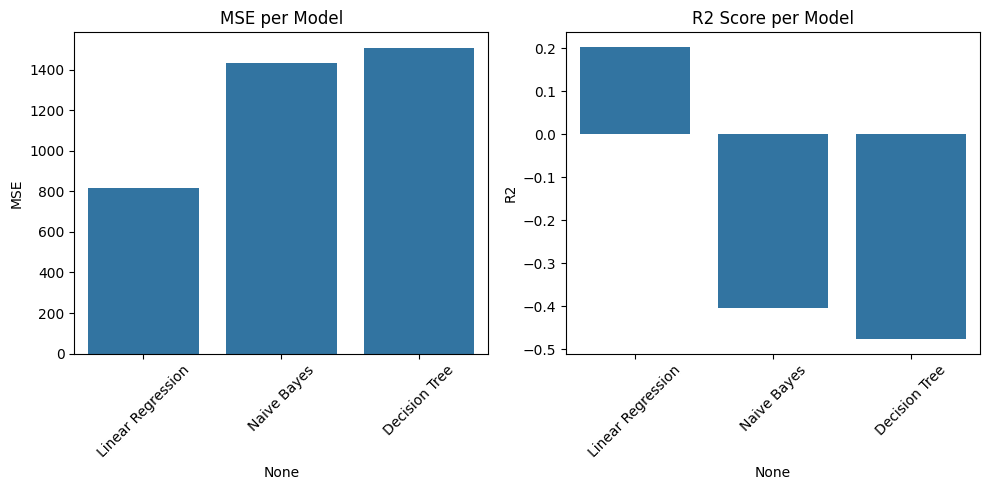

In [ ]:
# 8. Visualisasi Hasil Evaluasi

# Mengubah dictionary hasil evaluasi ke dalam bentuk DataFrame dan mentranspose-nya
# Sehingga model menjadi baris dan metrik (MSE, R2) menjadi kolom
results_df = pd.DataFrame(results).T

# Membuat figure dengan ukuran 10x5 inci dan membaginya menjadi 2 plot samping
plt.figure(figsize=(10, 5))

# Plot pertama: visualisasi Mean Squared Error untuk setiap model
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y='MSE', data=results_df)
plt.title('MSE per Model')
plt.xticks(rotation=45)  # Memiringkan label sumbu X agar mudah dibaca

# Plot kedua: visualisasi R2 Score untuk setiap model
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y='R2', data=results_df)
plt.title('R2 Score per Model')
plt.xticks(rotation=45)

# Menyesuaikan tata letak agar tidak saling menumpuk
plt.tight_layout()
plt.show()

Kode ini menampilkan visualisasi perbandingan performa model berdasarkan dua metrik utama: MSE (semakin kecil semakin baik) dan R² Score (semakin mendekati 1 semakin baik). Hasil prediksi yang sebelumnya disimpan dalam dictionary results diubah ke dalam bentuk DataFrame agar bisa diplot dengan seaborn. Dengan grafik ini, kita bisa dengan mudah melihat model mana yang paling akurat dan efisien.

## Rekomendasi

In [ ]:
# 9. Rekomendasi

# Menampilkan rekomendasi model terbaik berdasarkan skor R² tertinggi
print("\nRekomendasi:")

# Mencari nama model dengan nilai R² paling tinggi
best_model = results_df['R2'].idxmax()

# Menampilkan nama model terbaik dan skor R²-nya
print(f"Model terbaik berdasarkan R2 adalah: {best_model} dengan skor R2 {results_df.loc[best_model, 'R2']:.2f}")


Rekomendasi:
Model terbaik berdasarkan R2 adalah: Linear Regression dengan skor R2 0.20


Bagian ini digunakan untuk memberikan rekomendasi akhir berdasarkan evaluasi model. Model dengan nilai R² tertinggi dianggap paling baik karena mampu menjelaskan variansi data target dengan paling akurat. Nilai R² tersebut ditampilkan bersama nama modelnya sebagai hasil akhir analisis.